In [326]:
import os
import pandas as pd
import seaborn as sns

In [393]:
CaseName_Base = 'RTS24'
CaseName_ByStages = CaseName_Base + '_ByStages_nc'


Folder_A = 'A.The_full_year_MILP'
Folder_D = 'D.Representative_days_based_on_RES_and_Demand'
Folder_E = 'E.Representative_days_based_on_Line_Benefits_OptModel'
Folder_F = 'F.Representative_days_based_on_Line_Benefit_NN_OC_fy_1'
Folder_G = 'G.Representative_days_based_on_Line_Benefit_NN_OC_fy_2'
# Folder_H = 'H.Representative_days_based_on_Line_Benefit_NN_OC_fy_3'
# Folder_I = 'I.Representative_days_based_on_Line_Benefit_NN_OC_fy_4'

DirName  = os.getcwd()
_path_0 = os.path.join(DirName, CaseName_Base)
category_dict = {Folder_A: "FYMILP",Folder_D: "R&D",Folder_E: "OPT_LB",Folder_F: "NN_OPCOST",Folder_G: "NN_LB",}
colors_dict = { "FYMILP": "Blue","R&D": "Red","OPT_LB": "Black","NN_OPCOST": "Orange" ,Folder_G: "Green"}

In [328]:
def LoadingData(dir, folder,result, case, ncluster, cat1, cat2, cat3):
    if folder == 'A.The_full_year_MILP': 
        df = pd.read_csv(os.path.join(dir, folder, case, '3.Out', f'oT_Result_{result}_'+case+'.csv'), index_col=[0,1])
    else: 
        df = pd.read_csv(os.path.join(dir, folder, case+'_ByStages_nc'+str(ncluster), '3.Out', f'oT_Result_{result}_'+case+ '_ByStages_nc'+str(ncluster)+'.csv'), index_col=[0,1])

    df['CaseName'] = folder + ' - ' + case + str(ncluster)
    df['Clustering method'] = cat1
#     df['Category2'] = cat2
#     df['Category3'] = cat3
    df['Number of clusters'] = ncluster
    df = df.reset_index()
#df = df.reset_index().set_index(['CaseName', 'Category1', 'Category2', 'Category3', 'Category4'])
    # df = df.set_index('CaseName', append=True)
    return df

In [329]:
result = "CostSummary"
nbs_clusters = [(i+1)*10 for i in range(10)]
#nbs_clusters = [(i+1)*10 for i in range(2)]
folders = [Folder_A,Folder_D,Folder_E,Folder_F,Folder_G]
#folders = [Folder_A,Folder_D]

results_dfs = dict()
results_dfs[result] = dict()
for folder in folders: 
    results_dfs[result][folder] = dict()
    for nb_clusters in nbs_clusters:
        results_dfs[result][folder][nb_clusters] = LoadingData(DirName, folder,result, CaseName_Base, nb_clusters, category_dict[folder], '0.Full Year', 'MILP')


In [330]:
#Concatenate results dataframes 
results_dfs_concat = dict()
results_dfs_concat[result]=   pd.concat([results_dfs[result][folder][nb_clusters] for nb_clusters in nbs_clusters for folder in folders])

In [331]:
#Pivot the dataframe and rename some columns
results_dfs_pivot = results_dfs_concat["CostSummary"].pivot_table(values = "MEUR",columns = "Cost/Payment",index = ["Clustering method", "Number of clusters"]).reset_index().set_index(["Clustering method", "Number of clusters"])
results_dfs_pivot.rename({"Total          System Cost" : "TSC",'Network    Investment Cost' : "NIC" },axis = 1,inplace=True)

In [333]:
#Calculate difference with respect to FYMILP
diff_cols = ["TSC","NIC"]
#results_dfs_pivot.loc["NN_LL","Diff TSC"] = results_dfs_pivot.loc["FYMILP",diff_col] - results_dfs_pivot.loc["NN_LL",diff_col]
for diff_col in diff_cols:
    results_dfs_pivot[f'Diff_{diff_col}'] = results_dfs_pivot[diff_col] - results_dfs_pivot.loc['FYMILP', diff_col]


<Axes: xlabel='Number of clusters', ylabel='NIC'>

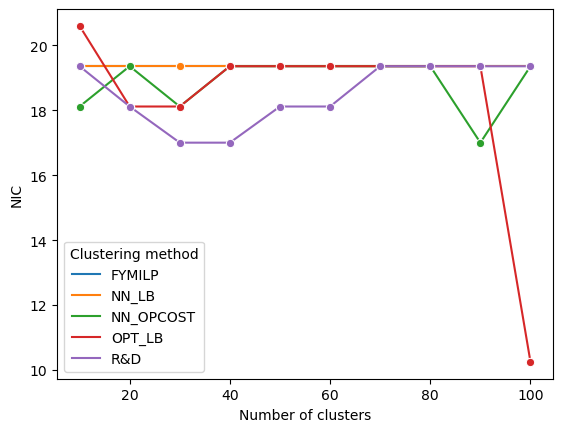

In [336]:
#Regular line plots
y = "TSC"
y= 'NIC'
#y = 'Difference_from_FYMILP'
x = "Number of clusters"
sns.lineplot(data = results_dfs_pivot,x = x, y = y,hue = "Clustering method",marker = "o")

In [366]:
results_dfs_pivot.loc[:,30]

KeyError: 30

<Axes: xlabel='Diff_NIC', ylabel='Diff_TSC'>

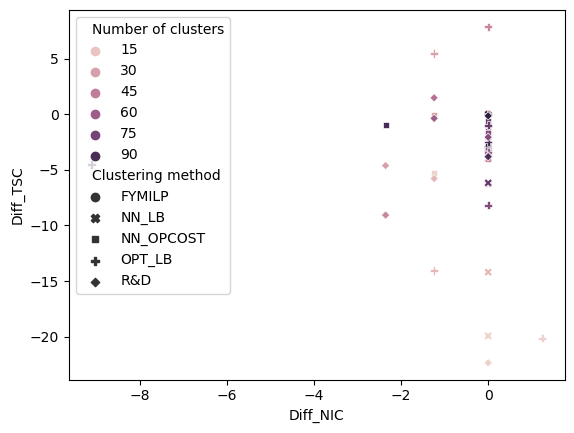

In [378]:
#Scatter plot with NIC vs TSC 
reindexed = results_dfs_pivot.reset_index()
f = reindexed["Number of clusters"]==30
y = "Diff_TSC"
x= 'Diff_NIC'

sns.scatterplot(data = reindexed,x = x, y = y,hue = "Number of clusters",style = "Clustering method" )

In [384]:
x

array([ 6.37180505, 10.84982798, 15.24963865,  4.20777265,  6.12874432,
       11.84450564,  9.50942242,  4.35343672, 15.0439103 , 14.74073382,
       19.61187097,  7.28574664,  6.53591878, 11.11394618, 10.31664784,
       19.62580353, 13.54058304,  1.67887065,  7.98355002, 15.04623114,
        8.95786033, 14.43025999, 12.62213609, 17.62082766,  8.23280477,
       11.00346026, 18.02637787, 12.72440429, 11.31375344, 13.63857377,
        9.42938833, 13.13196795,  8.70914527, 11.96759412,  9.94407843,
       19.54186181,  4.83279118, 13.81066065, 18.0255453 ,  5.12967113,
       14.90206486,  8.88061543, 13.59783037, 11.46590135, 14.07743431,
        2.8198173 , 11.44200261,  3.92441862,  1.56493627, 18.34723089,
       14.38300801, 10.60055287, 19.55840926, 18.84849009, 16.64215079,
       14.97050713, 14.22686905,  4.15981835,  3.55432728, 17.32493476,
        9.25348781, 14.0292326 ,  3.73745371,  8.8987176 , 10.22716479,
       15.77177697,  9.90698732,  3.38086676, 11.7427862 ,  5.23

In [387]:
y = 
y.to_numpympy()

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100,  10,  20,  30,
        40,  50,  60,  70,  80,  90, 100,  10,  20,  30,  40,  50,  60,
        70,  80,  90, 100,  10,  20,  30,  40,  50,  60,  70,  80,  90,
       100,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100], dtype=int64)

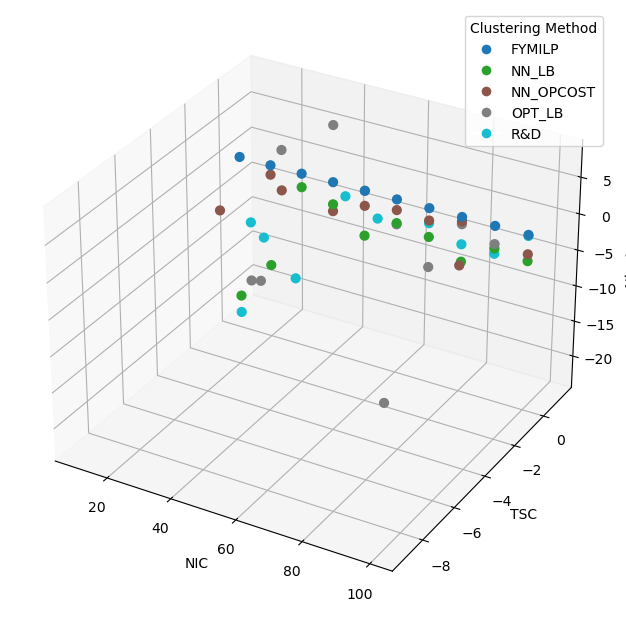

In [406]:
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
n = 200
x = reindexed["NIC"].to_numpy()
y = reindexed["TSC"].to_numpy()

z = reindexed["Diff_NIC"].to_numpy()
z = reindexed["Diff_TSC"].to_numpy()
x = reindexed["Number of clusters"].to_numpy()
c= reindexed["Clustering method"].to_numpy()

unique_categories = np.unique(c)
num_categories = len(unique_categories)

# Mapping each category to a unique color using a colormap
colors = plt.cm.tab10(np.linspace(0, 1, num_categories))

# Creating a dictionary to map category to color
category_to_color = {category: color for category, color in zip(unique_categories, colors)}

# Mapping the 'c' array to colors
point_colors = [category_to_color[category] for category in c]


# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# plot
sc = ax.scatter(x, y, z, s=40, c=point_colors, marker='o', alpha=1)
ax.set_xlabel('NIC')
ax.set_ylabel('TSC')
ax.set_zlabel('Nb clust')

legend_elements = [plt.Line2D([0], [0], marker='o', color='w', label=category, markerfacecolor=color, markersize=8) for category, color in category_to_color.items()]
ax.legend(handles=legend_elements, title='Clustering Method', loc='upper right')
